In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
%matplotlib inline

## Importo archivos y creo un unico DF

In [2]:
# Importo los 3 archivos, utilizo ese encoding ya que me da error, busque en Kaggle en los retos a ver cual era. 
df1 = pd.read_csv("PoliceKillingsUS.csv", encoding='Windows-1252')
df2 = pd.read_csv("MedianHouseholdIncome2015.csv",encoding='Windows-1252')
df3 = pd.read_csv("PercentagePeopleBelowPovertyLevel.csv",encoding="Windows-1252")

In [86]:
# Hago el Merge, a traves de la columna "State" ya que si es por city solamente coinciden 4 valores.
# Creo una funcion para quedarme solo con los valores numericos de una columna. 
def limpio(x):
    try:
        num = "".join(re.findall("\d.",x))
        return  int(num)
    except:
        return None

# Filtro el df2 para quedarme con Geographic areas unicas.
df2_new = df2.dropna() # elimino los valores nans que son pocos. 
df2_new["Clean_MI"] = df2_new["Median Income"].apply(limpio).astype("float64") # Me quedo solo con valores numericos
d2 = pd.DataFrame(df2_new.groupby("Geographic Area")["Clean_MI"].mean())

# Filtro el df3 para quedarme con Geographic areas unicas.
df3_new = df3.dropna()
df3_new["Clean_PR"] = df3_new["poverty_rate"].apply(limpio).astype("float64")
d3 = pd.DataFrame(df3_new.groupby("Geographic Area")["Clean_PR"].mean())

# Hago el merge de los dataframes 
df = df1.merge(d2,left_on="state",right_on="Geographic Area").merge(d3,left_on="state",right_on="Geographic Area").dropna()

# Imprimo el head del dataframe para familiarizarme con las columnas. 
display(df.head(3))


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Clean_MI,Clean_PR
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,13667.301394,21.054645
1,138,Antonio Zambrano-Montes,10/02/15,shot and Tasered,unarmed,35.0,M,H,Pasco,WA,True,other,Foot,False,13667.301394,21.054645
2,295,Jamison Childress,19/03/15,shot,unarmed,20.0,M,W,Sumas,WA,True,attack,Not fleeing,False,13667.301394,21.054645


##  3 histogramas con la cantidad adecuada de bins:

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Age Frequency Distribution')

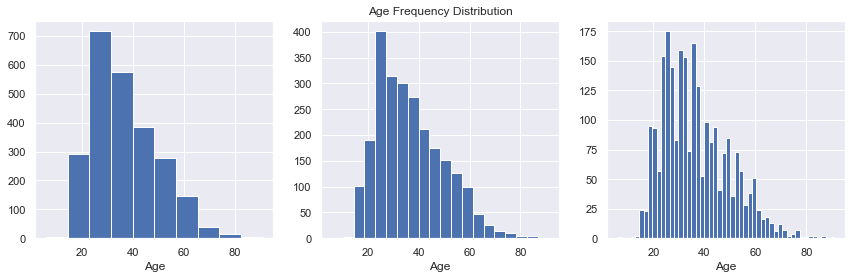

In [61]:
# Histograma de la edad. 
sns.set()
x = df["age"]
fig,ax = plt.subplots(1,3)
ax[0].hist(x)
ax[1].hist(x,bins=20)
ax[2].hist(x,bins=50)
plt.subplots_adjust(right=2)
ax[0].set_xlabel("Age")
ax[1].set_xlabel("Age")
ax[2].set_xlabel("Age")
ax[1].set_title('Age Frequency Distribution')
# Creo que 20 bins son suficientes, vemos que la edad mas comun es cercana a los 30 años, aunque también hay 
# una buena cantidad de personas mayores a 30 años.

Text(0.5, 1.0, 'Median Income by State')

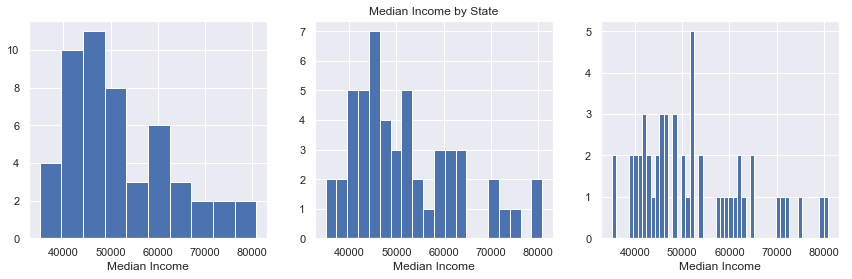

In [60]:
# Histograma del Median Income por estado. 
sns.set()
x = df["Clean_MI"].unique()
fig,ax = plt.subplots(1,3)
ax[0].hist(x)
ax[1].hist(x,bins=20)
ax[2].hist(x,bins=50)
plt.subplots_adjust(right=2)
ax[0].set_xlabel("Median Income")
ax[1].set_xlabel("Median Income")
ax[2].set_xlabel("Median Income")
ax[1].set_title('Median Income by State')
# Para este caso 10 bins son suficientes, vemos que lo mas comun es que ganen menos de 50.000 dolares anuales.

Text(0.5, 1.0, 'Poverty  rate by State')

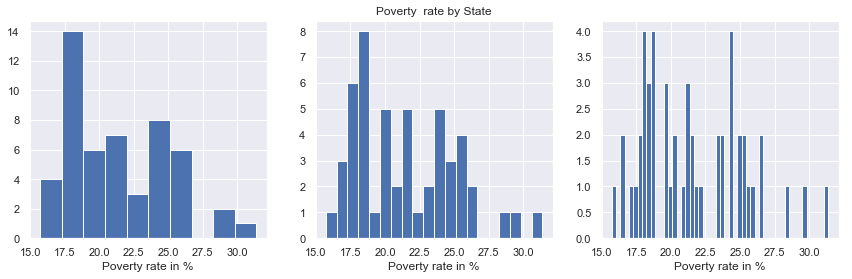

In [69]:
# Histograma del Median Income por estado. 
sns.set()
x = df["Clean_PR"].unique()
fig,ax = plt.subplots(1,3)
ax[0].hist(x)
ax[1].hist(x,bins=20)
ax[2].hist(x,bins=50)
plt.subplots_adjust(right=2)
ax[0].set_xlabel("Poverty rate in %")
ax[1].set_xlabel("Poverty rate in %")
ax[2].set_xlabel("Poverty rate in %")
ax[1].set_title('Poverty  rate by State')
# En este caso tambien creo que 10 bins es suficiente, la moda es entre 17.5-20%, y la gran mayoria tienen un
# poverty rate menor a 27,5%. 

## Plot a scatter distribution of data for a joined column with any column you like

Text(0.5, 1.0, 'Median Income Vs Age')

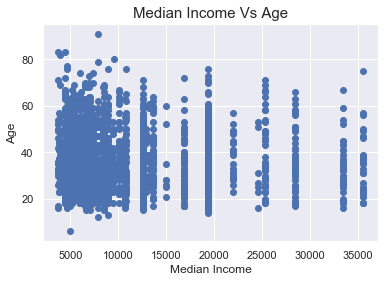

In [100]:
y = df["age"]
x = df["Clean_MI"]
plt.scatter(x,y)
plt.xlabel("Median Income")
plt.ylabel("Age")
plt.title("Median Income Vs Age",fontsize=15)

# No es muy ilustrativo ya que el Median Income se repite muchas veces por cada estado, al final termina siendo
# un valor categorico basicamente

-0.346669044246554

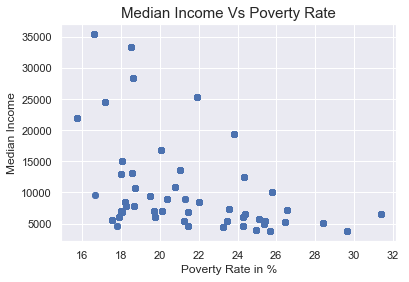

In [79]:
x = df["Clean_PR"]
y = df["Clean_MI"]
plt.scatter(x,y)
plt.xlabel("Poverty Rate in %")
plt.ylabel("Median Income")
plt.title("Median Income Vs Poverty Rate",fontsize=15)
display(x.corr(y))
# Vemos que existe una correlacion negativa, es decir, en general, mientras mas baja sea el Poverty Rate, mayor
# El Median Income, lo cual tiene perfecto sentido. 

# #* Create a plot for a category distribution (using seaborn violin plot o other kind of graph that fits better your data using catplot) https://seaborn.pydata.org/generated/seaborn.catplot.html

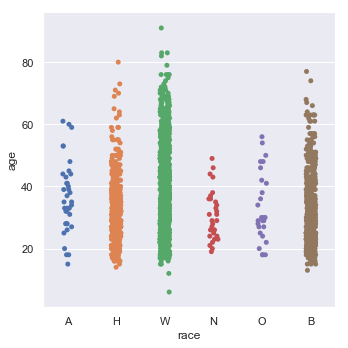

In [182]:
sns.catplot(x="race",y="age",data=df)

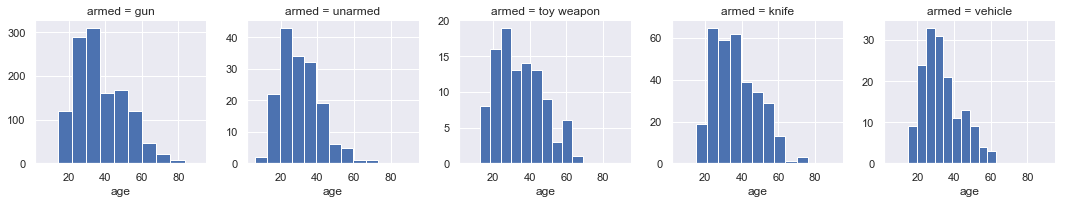

In [125]:
# Edades por tipo de arma.
# Nos fijamos con Value counts que es lo mas comun
comun_weapon = df["armed"].value_counts().index[:5].tolist()
df_c = df[df["armed"].isin(comun_weapon)]


g = sns.FacetGrid(df_c, col="armed",sharey=False)
g.map(plt.hist,"age")

Text(0.5, 1.0, 'People Killed for race')

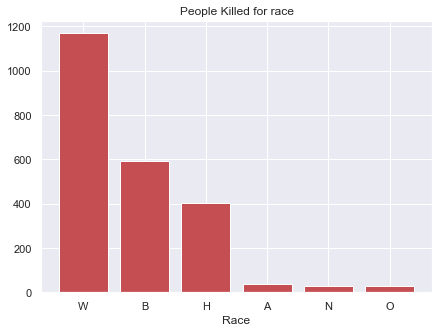

In [206]:
# Numero de personas asesinadas por raza

x = df["race"].value_counts().index.tolist()
y = df["race"].value_counts().values.tolist()
plt.rcParams["figure.figsize"] = (7,5)
plt.bar(x,y,color="r")
plt.xlabel("Race")
plt.title("People Killed for race")

## Do a comparision with 3x3 subplot matrix. Plots can be anything you liked about the dataset

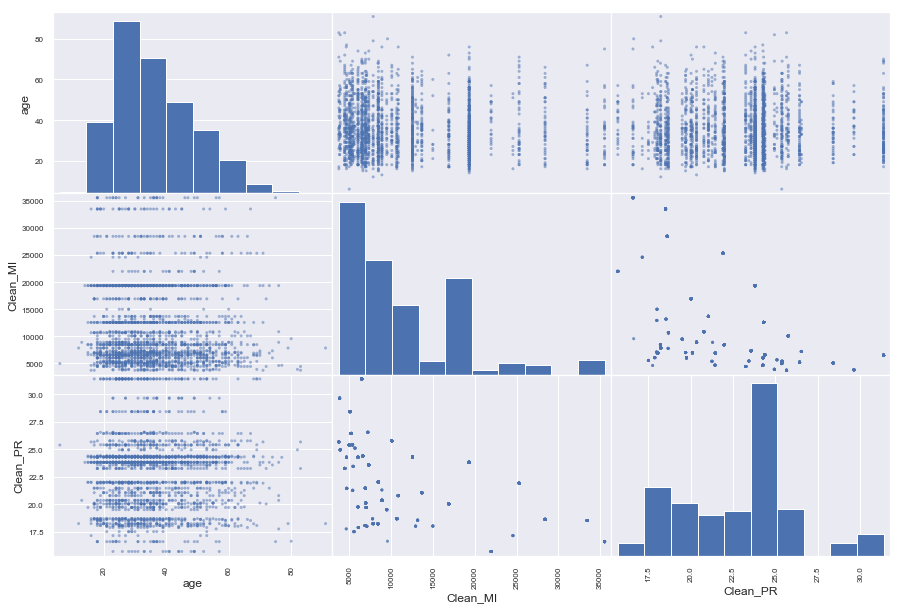

In [180]:
plott = df[["age","Clean_MI","Clean_PR"]]
plt.rcParams["figure.figsize"] = (15,10)
a = pd.plotting.scatter_matrix(plott)
